<a href="https://colab.research.google.com/github/sathwikkes/Yelp-Image-Classification/blob/main/data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# I will be working with Yelp Image Data set

In [2]:
#!pip list -v 
#checking/making sure I have the proper modules loaded

I had a hard time uploading a folder with almost 200,000 photos into my google drive in one go. I made a script with the help of this resource and split the big folder into subfolders to play around with.  
https://gist.github.com/zupo/5849843

Import the Libraries

In [3]:
# importing necessary modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os 
import io
import seaborn as sns
from PIL import Image

Load the Data

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import files
uploaded = files.upload()

Saving photos.json to photos (1).json


In [6]:
# !ls "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics"

In [7]:
data = pd.read_json(uploaded.get('photos.json'), lines=True)


Data Exploration & Wrangling

In [8]:
data.head()

,photo_id,business_id,caption,label
0,001kKc6P_rmgaXThAHxEkw,zKZc8GwCaKbACaV0HZAmpg,Clean and simple interior,inside
1,002gqWfVal1D2DT6oA-bVQ,qnZzSC4TKen19Gz9nyKCvw,12oz. Boneless Ribeye | Grilled to perfection ...,food
2,002GtTSYyQ4swIZyEnfF5A,9km51KaQujxsSgdaG9gYSw,"The Most Yummy Tarts: Chantilly, Guava, Salted...",food
3,0036yehPJxVwNZDRDYH2jQ,Qg9L37JCd-PkcWMj9VAWmw,Dynamic Duo! Great dance music!,inside
4,003Isvt6NCJ567PdAEwrfA,zgQHtqX0gqMw1nlBZl2VnQ,,food


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.shape

(200000, 4)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   photo_id     200000 non-null  object
 1   business_id  200000 non-null  object
 2   caption      200000 non-null  object
 3   label        200000 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


In [12]:
data.describe()

,photo_id,business_id,caption,label
count,200000,200000,200000,200000
unique,200000,39830,72475,5
top,ADMuYZ4q_pDtzYBeteyQoA,RESDUcs7fIiihp38-d6_6g,,food
freq,1,652,107420,118597


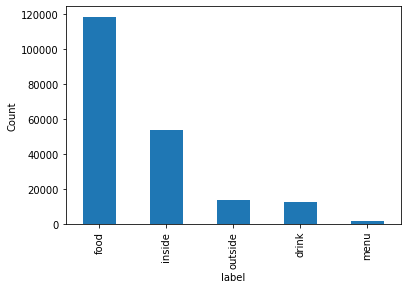

In [13]:
data.label.value_counts().plot(kind='bar', xlabel='label', ylabel='Count')

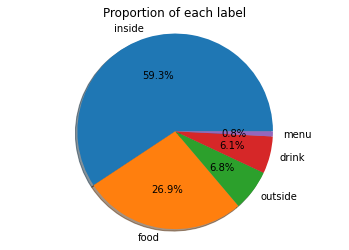

In [14]:
plt.pie(data.label.value_counts(), explode=None, labels= data.label.unique(), shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each label')
plt.show()

Reading in the Photos

In [15]:
import glob
img_dir_train = '/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics' 

data_path = os.path.join(img_dir_train,'*g')

files = glob.glob(data_path)

# creaing dictionary with key as photo_id and value as image path
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x 
                     for x in glob.glob(data_path)}


In [16]:
data['path'] = data['photo_id'].map(imageid_path_dict.get)

In [17]:
#img_dir_test = '/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/test'
#data_path_test= os.path.join(img_dir_test, '*g')
#files_test = glob.glob(data_path_test)
#imageid_path_dict_test = {os.path.splitext(os.path.basename(x))[0]: x 
                     #for x in glob.glob(data_path_test)}

In [18]:
#data['path'] = data['photo_id'].map(imageid_path_dict_test.get)

In [19]:
# listing all the paths of the pictures that were imported
data[data.path.notnull()]['path']

636       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
933       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
1044      /content/drive/MyDrive/Colab-Notebooks/yelp-im...
1167      /content/drive/MyDrive/Colab-Notebooks/yelp-im...
1367      /content/drive/MyDrive/Colab-Notebooks/yelp-im...
                                ...                        
199363    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199600    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199647    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199648    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199985    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
Name: path, Length: 1000, dtype: object

In [20]:
df = data[data.path.notnull()]

In [21]:
df.iloc[636]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/palsLqpRPPsPvLOOMu0Tvw.jpg'

In [22]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0bhL0XvLMxn-W-fu2c7pkA.jpg') 

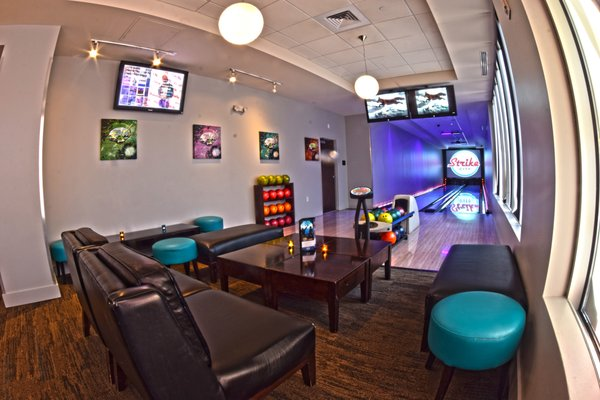

In [23]:
# have to import this module bc cv2.imshow() does not work in colab
# images read in opencv are in the format of blue green red
from google.colab.patches import cv2_imshow
cv2_imshow(img)  

In [24]:
print(img.shape)
print(type(img))

(400, 600, 3)
<class 'numpy.ndarray'>


Image Manipulation & Fundamentals

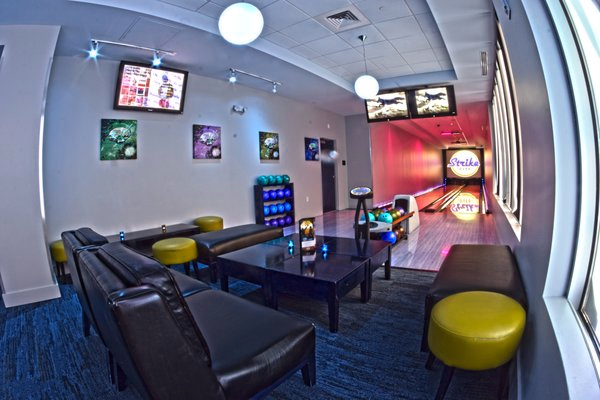

In [25]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
cv2_imshow(image_rgb) 

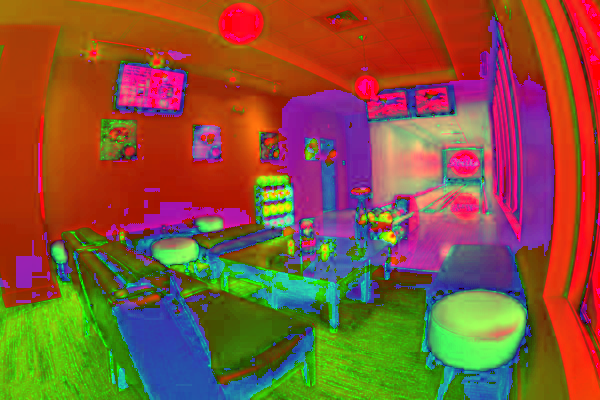

In [26]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv) 

In [27]:
#image2 = mpimg.imread("/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0bhL0XvLMxn-W-fu2c7pkA.jpg")
#plt.imshow(image2)

In [28]:
df.loc[1044]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0FfYeFWmxcJqxwyN5PZPbw.jpg'

In [29]:
img2 = cv2.imread('/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0FfYeFWmxcJqxwyN5PZPbw.jpg')

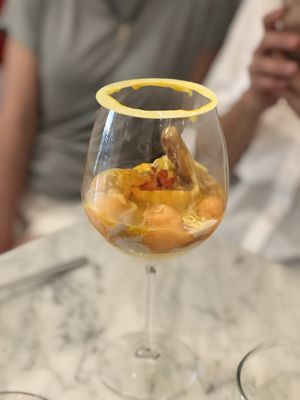

In [30]:
cv2_imshow(img2)

In [31]:
df.loc[1167]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0glSs9z_jEE5VYVUwrsFIA.jpg'

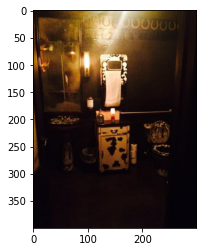

In [32]:
# viewing an image using matplotlib
import matplotlib.image as mpimg
mimage = mpimg.imread("/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0glSs9z_jEE5VYVUwrsFIA.jpg")
plt.imshow(mimage)

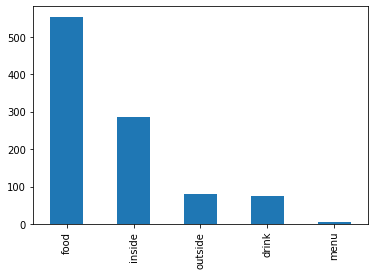

In [33]:
df.label.value_counts().plot.bar()
plt.show()

In [34]:
def rand_pic():
  """
  function that displays a random image from the dataset
  """
  
  index =int(np.random.choice(df.index, 1))
  path = df.loc[index]['path']
  plt.figure()
  img = mpimg.imread(path)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title("IMG # {}".format(index))
  plt.imshow(img)

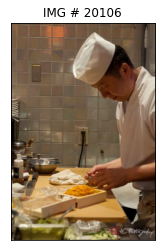

In [35]:
#df.loc[np.random.choice(df.index, 1)]
rand_pic()

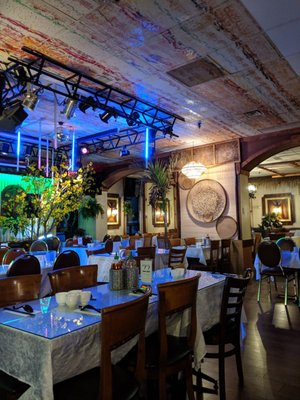

In [36]:
#double checking if the image is correctly identified
path = df.loc[116113]['path']
x=cv2.imread(path)
cv2_imshow(x)

In [37]:
classes = ['food', 'inside', 'outside', 'drink', 'menu']
num_classes = len(classes)
samples = 5
classes_with_numbers = {0: 'drink',
                      1: 'food',
                      2: 'inside',
                      3: 'menu',
                      4: 'outside'
                    }
#for y,cls in enumerate(classes:
#                       idxs = np.flatnonzero(y_train)

In [38]:
df.head()

,photo_id,business_id,caption,label,path
636,0bhL0XvLMxn-W-fu2c7pkA,H4E4sZ6PKBef65hU0GKi_g,"Our Kingpin room has 2 lanes, private bar acce...",inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...
933,0eFLVEyJhskLZgnbecseKg,PIpCmok4zzozeSI7iT9H9A,,outside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...
1044,0FfYeFWmxcJqxwyN5PZPbw,umXvdus9LbC6oxtLdXelFQ,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...
1167,0glSs9z_jEE5VYVUwrsFIA,woXlprCuowrLJswWere3TQ,,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...
1367,0ifISIekaQ9xge4_fXyHwg,2FfZUyA82YhQCjWNiqDCzQ,Inside Lenny's!,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...


In [39]:
df.shape

(1000, 5)

In [40]:
df['class_by_number'] = pd.Categorical(df['label']).codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df['image'].map(lambda x:x.shape).value_counts()

(400, 533, 3)    211
(400, 300, 3)    147
(400, 600, 3)    128
(400, 400, 3)    124
(399, 600, 3)     55
                ... 
(264, 279, 3)      1
(150, 300, 3)      1
(319, 599, 3)      1
(284, 600, 3)      1
(303, 600, 3)      1
Name: image, Length: 156, dtype: int64

In [43]:
df.shape

(1000, 7)

In [ ]:
#RESIZING images 
#dir = "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics"

#for filename in glob.iglob(dir + '/*.jpg'):
#  im = Image.open(filename)
#  imResize = im.resize((75,75), Image.ANTIALIAS)
#  imResize.save(filename, 'JPEG', quality = 90)

Create and Compile a Model

1. Build the model
    *   3 Layer Fully Connected Convolutional Neural Network
    *   XGBoost 
2. Run the model
3. Train/Fit the data to the model
4. Evaluate the model on the test set 
5. Error Analysis

In [44]:
from sklearn.utils import shuffle
import random
shuffle(df)

,photo_id,business_id,caption,label,path,class_by_number,image
193017,YXhpL9S_ALNRQNArGp0EMg,El1HTj_hsRyRdOEbzJqgfg,Photo of the wall menu.,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[44, 22, 9], [44, 22, 9], [44, 22, 9], [44, ..."
23164,7betyniyr9Bf_SHKyTlxuA,K7lWdNUhCbcnEvI0NhGewg,The front of Wicked Spoon,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[9, 10, 4], [5, 6, 0], [1, 2, 0], [0, 0, 0],..."
27654,8O1r40zT0KPOB09XSCXeLA,kmNkoAjnl5uwCTuZepntag,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[169, 177, 188], [197, 206, 215], [177, 186,..."
191734,YqZjJxraT1xe0Cps8RvE_Q,_IoKchl_ov6HX6l3aqoDzg,"Sarah James, Aaron Howard and Travis Snowberger",inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[15, 16, 20], [16, 17, 21], [16, 17, 21], [1..."
180990,X2do5lMJ0H1GcAD5gk17jg,hbkEMFfZ6_-gYB6nddZ5BQ,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[217, 208, 169], [218, 208, 172], [221, 210,..."
...,...,...,...,...,...,...,...
175110,w85MB0xbuwQzz7fJxlg6tA,hAGqD8Qblo-NN5gmaYOd6A,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[231, 227, 228], [231, 227, 228], [231, 227,..."
191546,Yq3pP1ig8LUmil_UOB-ATw,rLvf_6ZFYUGBMrs6Wz4Dxw,"LADY-N-RED - cabernet, raspberry, hibiscus, le...",drink,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,0,"[[[3, 3, 5], [3, 3, 5], [3, 3, 5], [3, 3, 5], ..."
126526,opahSREGr5OucIRcczM8vw,3xmfT7l3xNH5LK1dLzfvGw,,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[95, 136, 118], [80, 123, 104], [88, 133, 11..."
152298,sNZJDjHbMu0OmFOVSFNBiA,qhQvtMzO_an8kR0zg6tPRw,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[141, 136, 132], [144, 139, 135], [149, 144,..."


In [45]:
X = df['image']
y = df['class_by_number']

In [46]:
#X = np.asarray(X).astype('float32')

ValueError: ignored

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=123)

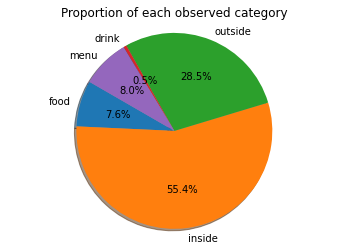

In [48]:
size = np.bincount(y)
explode = (0,0,0,0,0,0)
plt.pie(size,explode=None, labels=classes,autopct = '%1.1f%%', shadow=True, startangle = 150)
plt.axis('equal')
plt.title("Proportion of each observed category")

plt.show()

In [ ]:
"""
x_traino = np.asarray(X_train['image'].tolist())
x_testo = np.asarray(X_test['image'].tolist())


x_train_mean = np.mean(x_traino)
x_train_std = np.std(x_traino)


x_test_mean = np.mean(x_testo)
x_test_std = np.std(x_testo)

x_traino = (x_traino - x_train_mean)/x_train_std
x_test = (x_testo - x_test_mean)/x_test_std
"""

In [ ]:
#x_traino = x_traino.reshape(x_traino.shape[0], *(75,75,3))
#x_testo = x_testo.reshape(x_testo.shape[0], *(75,75,3))

In [49]:
print("Shape of train images is: ", X_train.shape)
print("Shape of test images is: ", X_test.shape)
print("Shape of lables is: ", y_train.shape)
print("Shape of labels is: ", y_test.shape)

Shape of train images is:  (800,)
Shape of test images is:  (200,)
Shape of lables is:  (800,)
Shape of labels is:  (200,)


In [50]:
import tensorflow as tf   
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python import keras
from tensorflow.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten 
from keras.optimizers import Adam,Nadam,RMSprop,SGD,Adagrad,Adamax 
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier



from sklearn.model_selection import GridSearchCV


Train, Test, Split the Data

Building CNN to classify images

1.) Build Model

In [51]:
model = Sequential()
model.add(Dense(256, input_dim=28*28, activation ='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'adam', 
             metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 304,106
Trainable params: 304,106
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(X,y, batch_size=32, epochs = 40, validation_split=0.1)

ValueError: ignored

In [ ]:
def create_model():
  model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (100,100,3)),
                               tf.keras.layers.MaxPooling2D(2,2),
                               tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                               tf.keras.layers.MaxPooling2D(2,2),
                               tf.keras.layers.Dropout(0.25),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128,activation='relu'),
                               tf.keras.layers.Dropout(0.5),
                               tf.keras.layers.Dense(10,activation = tf.nn.softmax)
  ])
  model.compile(tf.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics =['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn= create_model, verbose=0)

GridSearchCV

In [ ]:
batch_size = [50,100,150]
epochs = [5, 10,15,20]
optimizer = ['SGD', 'Adagard']
learn_rate = [0.001, 0.01, 0.1]
param_grid = dict(batch_size = batch_size, epochs = epochs, optimizer = optimizer)
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1, cv=3)

In [ ]:
result = grid.fit(X, y)

In [ ]:
model_adam = tf.keras.Sequential([
                                  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (75,75,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Dropout(0.25),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [ ]:
model_adam.summary()

Miscellaneous Code (ignore...)

In [ ]:
ImageDataGenerator.flow_from_directory( 
    directory = img_dir_train,
    target_size = (256,256),
    color_mode='grayscale',
    classes = classes, 
    class_mode=None,
    shuffle=True, 
    seed=123
)

TypeError: ignored

In [ ]:
#train = df.iloc[0:800, :]
#est = df.iloc[800:1000, :]
# np.random.randint() ## random integere number generator

In [ ]:
#print("Train dataset shape: " , train.shape)
#print("Test dataset shape: ", test.shape)

In [ ]:
batch_size = 32
img_height = 256
img_width =256

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 0 files belonging to 0 classes.
Using 0 files for training.


TypeError: ignored

In [ ]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    img_dir_train,
    labels=classes,
    label_mode='categorical',
    color_mode='rgb', 
    batch_size=32, 
    image_size=(256,256), 
    shuffle=True, 
    interpolation='bilinear' 
)

ValueError: ignored